# Question 4: Spike Triggered Average (STA)

Calculate and plot the spike triggered average over a 100 ms window.

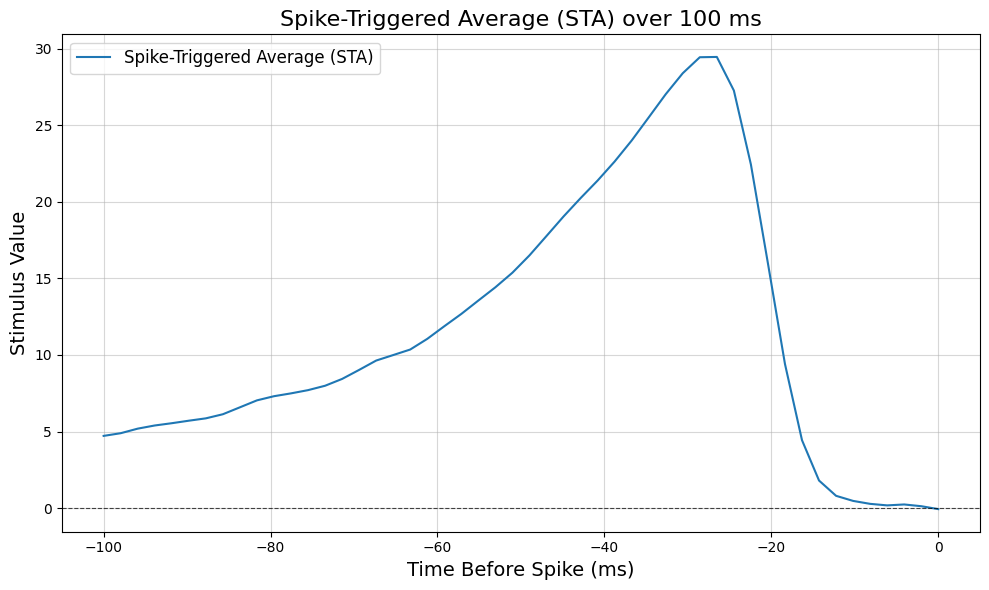

In [5]:
import numpy as np
import matplotlib.pyplot as plt

stim = np.loadtxt("stim.dat")
rho = np.loadtxt("rho.dat") #sampled every 2ms
window_size = int(100/2)



def sta(window_size):

    spike_indices = np.where(rho == 1)[0]  #we only want the spikes

    sta = np.zeros(window_size)
    spikes = 0 

    for spike in spike_indices:
        if spike >= window_size: # we only want spikes beyond 50 to fit the window.
            sta += stim[spike - window_size:spike]
            spikes += 1
    sta /= spikes
    return sta
sta = sta(window_size)

# Plot STA
time = np.linspace(-100, 0, window_size)  # Time axis for STA
plt.figure(figsize=(10, 6))
plt.plot(time, sta, label="Spike-Triggered Average (STA)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
plt.xlabel("Time Before Spike (ms)", fontsize=14)
plt.ylabel("Stimulus Value", fontsize=14)
plt.title("Spike-Triggered Average (STA) over 100 ms", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
